<h1><center>PROYECTO - DATA CLEANING</center></h1>

# Librerias a utilizar

In [4]:
import pandas as pd # Manejo de Dataframes 
import numpy as np # Funciones para arrays
import os
import matplotlib.pyplot as plt # Graficar
from matplotlib import style
import seaborn as sns # Graficar
from fitter import Fitter # Distribuciones

ModuleNotFoundError: No module named 'fitter'

# Datos - Entrenamiento

In [ ]:
# Llamar los datos
data_training = pd.read_csv("training.csv")
data_training

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,349995,-999.000,71.989,36.548,5.042,-999.00,-999.000,-999.000,1.392,5.042,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,4.505083,b
249996,349996,-999.000,58.179,68.083,22.439,-999.00,-999.000,-999.000,2.585,22.439,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,2.497259,b
249997,349997,105.457,60.526,75.839,39.757,-999.00,-999.000,-999.000,2.390,22.183,...,1,41.992,1.800,-0.166,-999.000,-999.00,-999.000,41.992,0.018636,s
249998,349998,94.951,19.362,68.812,13.504,-999.00,-999.000,-999.000,3.365,13.504,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.681611,b


In [3]:
# Tipos de datos
data_training.dtypes

EventId                          int64
DER_mass_MMC                   float64
DER_mass_transverse_met_lep    float64
DER_mass_vis                   float64
DER_pt_h                       float64
DER_deltaeta_jet_jet           float64
DER_mass_jet_jet               float64
DER_prodeta_jet_jet            float64
DER_deltar_tau_lep             float64
DER_pt_tot                     float64
DER_sum_pt                     float64
DER_pt_ratio_lep_tau           float64
DER_met_phi_centrality         float64
DER_lep_eta_centrality         float64
PRI_tau_pt                     float64
PRI_tau_eta                    float64
PRI_tau_phi                    float64
PRI_lep_pt                     float64
PRI_lep_eta                    float64
PRI_lep_phi                    float64
PRI_met                        float64
PRI_met_phi                    float64
PRI_met_sumet                  float64
PRI_jet_num                      int64
PRI_jet_leading_pt             float64
PRI_jet_leading_eta      

In [4]:
# Variables y tag
data_training.columns.values

array(['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet',
       'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep',
       'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau',
       'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_tau_pt',
       'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta',
       'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet',
       'PRI_jet_num', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta',
       'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi',
       'PRI_jet_all_pt', 'Weight', 'Label'], dtype=object)

In [5]:
# Descripción de los datos 
data_training.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


In [6]:
# Eliminar columnas no necesarias sin necesitar coorrelación. 
data_training = data_training.drop('EventId', axis = 1)

In [7]:
# Cambiar los label donde s-> 0 y b-> 1. La columna se va a llamar tag
data_training['Tag'] = data_training['Label'].map({'s': 0, 'b': 1})
data_training = data_training.drop('Label', axis=1)
data_training

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Tag
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,0
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,1
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,1
3,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,1
4,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,-999.000,71.989,36.548,5.042,-999.00,-999.000,-999.000,1.392,5.042,55.892,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,4.505083,1
249996,-999.000,58.179,68.083,22.439,-999.00,-999.000,-999.000,2.585,22.439,50.618,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,2.497259,1
249997,105.457,60.526,75.839,39.757,-999.00,-999.000,-999.000,2.390,22.183,120.462,...,1,41.992,1.800,-0.166,-999.000,-999.00,-999.000,41.992,0.018636,0
249998,94.951,19.362,68.812,13.504,-999.00,-999.000,-999.000,3.365,13.504,55.859,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.681611,1


In [8]:
# Cantidad de valores que tenemos en Tag 
data_training['Tag'].value_counts()

Tag
1    164333
0     85667
Name: count, dtype: int64

In [9]:
# Separar datos en caracarteristicas y predicción
data_caract = data_training.drop('Tag', axis = 1)
data_tag = data_training['Tag']

# Visualización de los datos

## Histogramas y distribuciones de los datos

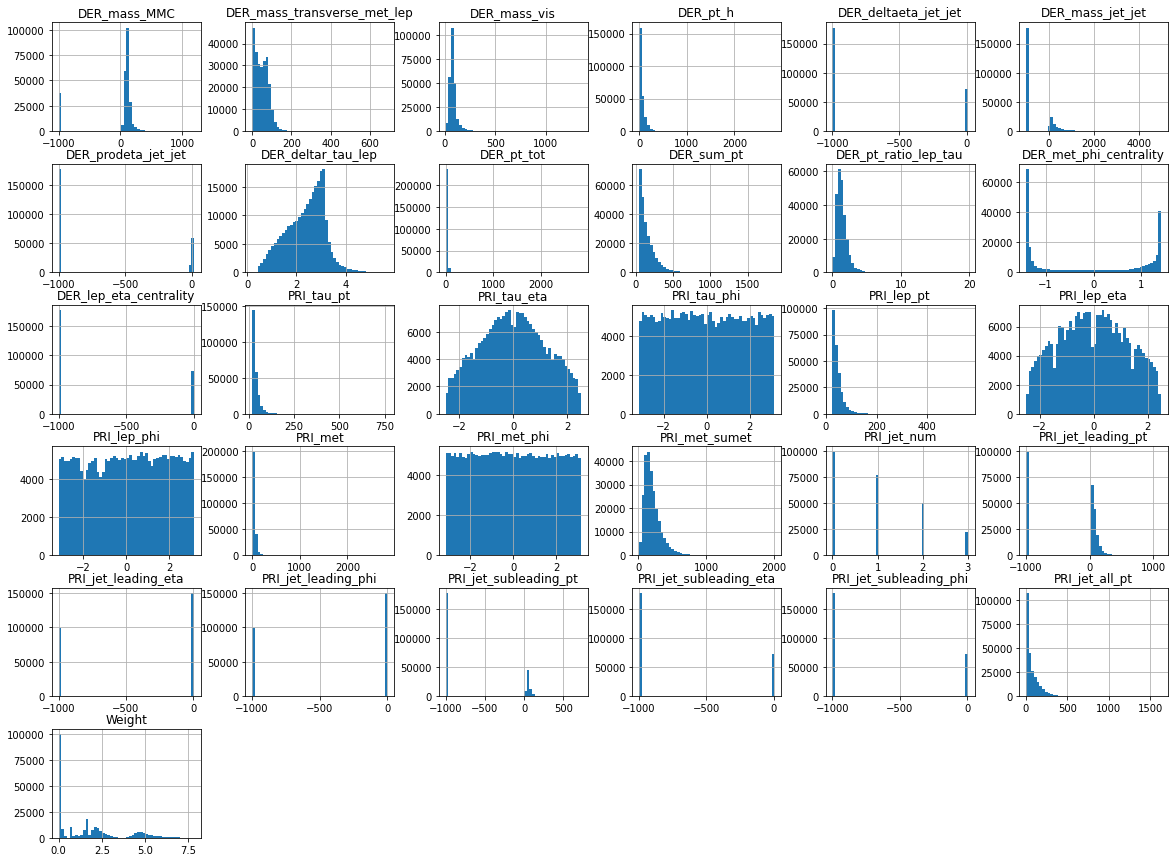

In [10]:
# Primera visualización 
data_caract.hist(bins=50, figsize=(20,15))
plt.show()

## Correlaciones

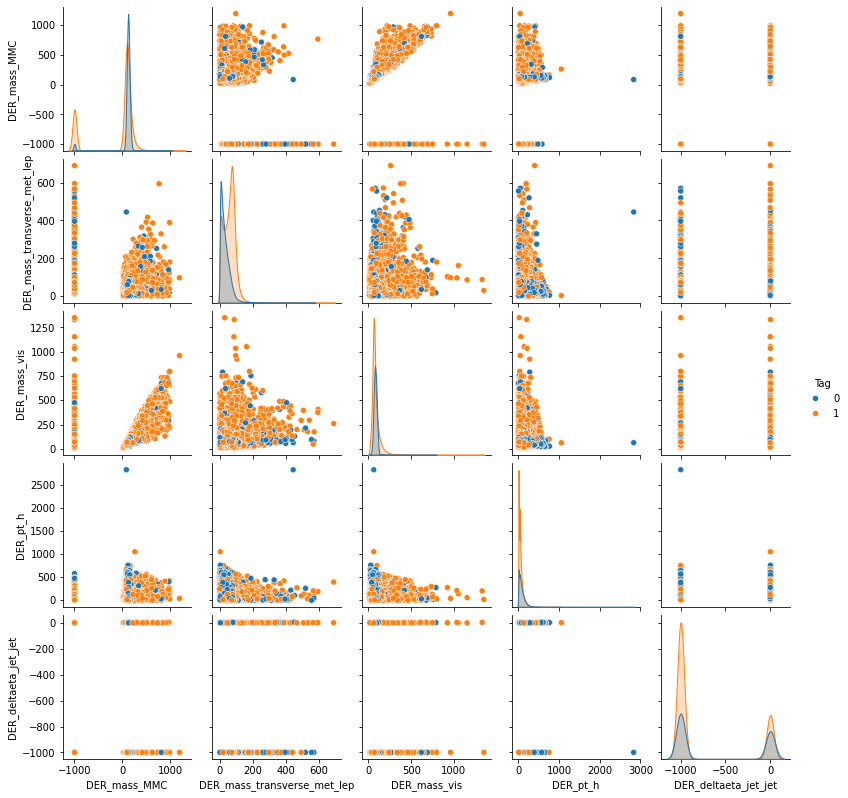

In [11]:
# Correlacion de las caracteristicas con tag
subset1 = data_training[np.append(data_training.columns.values[:5], 'Tag')]
sns.pairplot(subset1, hue='Tag', height=2.25)

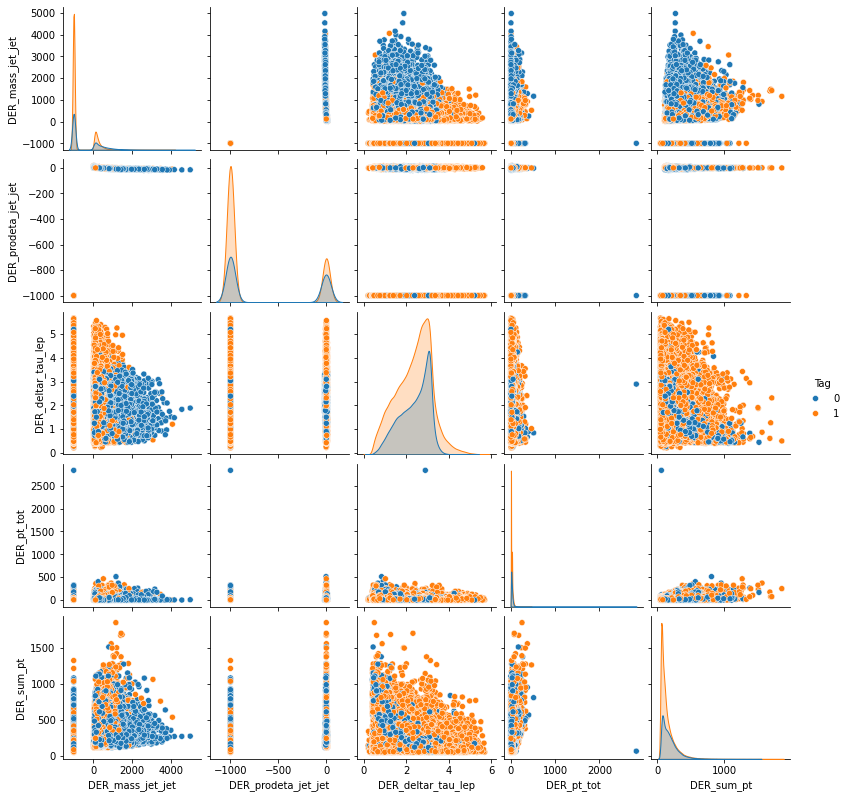

In [12]:
# Correlacion de las caracteristicas con tag
subset2 = data_training[np.append(data_training.columns.values[5:10], 'Tag')]
sns.pairplot(subset2, hue='Tag', height=2.25)

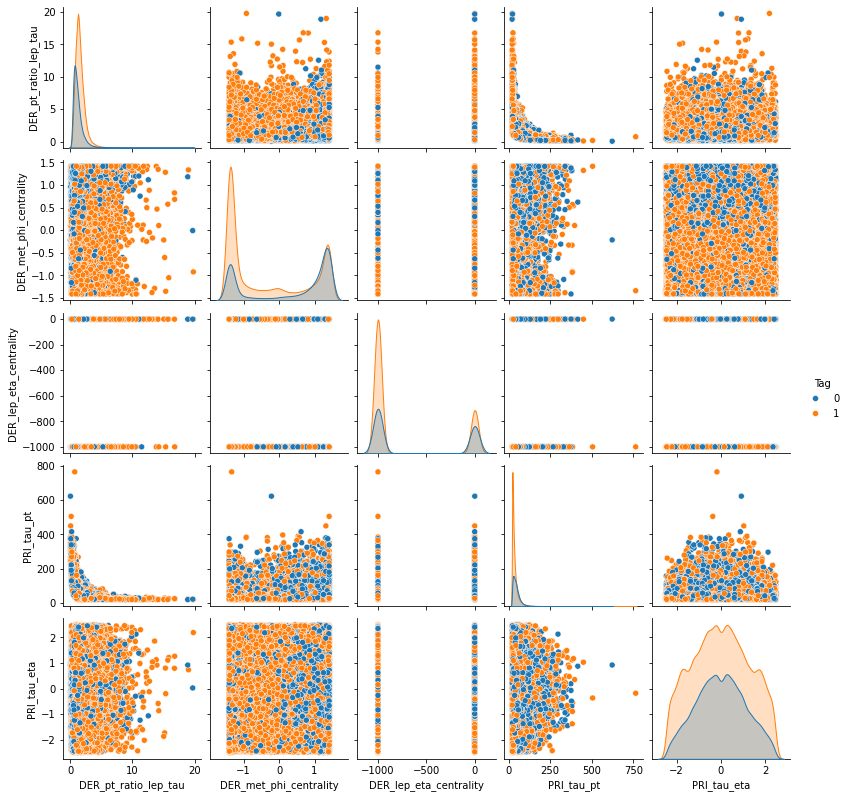

In [13]:
# Correlacion de las caracteristicas con tag
subset3 = data_training[np.append(data_training.columns.values[10:15], 'Tag')]
sns.pairplot(subset3, hue='Tag', height=2.25)

In [ ]:
# Correlacion de las caracteristicas con tag
subset4 = data_training[np.append(data_training.columns.values[15:20], 'Tag')]
sns.pairplot(subset4, hue='Tag', height=2.25)

In [ ]:
# Correlacion de las caracteristicas con tag
subset5 = data_training[np.append(data_training.columns.values[20:25], 'Tag')]
sns.pairplot(subset5, hue='Tag', height=2.25)

In [ ]:
# Correlacion de las caracteristicas con tag
subset6 = data_training[np.append(data_training.columns.values[25:30], 'Tag')]
sns.pairplot(subset6, hue='Tag', height=2.25)

In [ ]:
# Correlación entre las caracteristicas por Heatmap
def data_corr(data): #matriz de correlación
    correlation = data.corr()
    plt.figure(figsize=(12, 10)) # Tamaño de la Figura
    sns.heatmap(correlation,fmt='.1f' ,annot=False, cmap="RdYlGn", cbar=True, linewidths=.5)

data_corr(data_caract)

## Eliminar correlaciones por eliminación recursiva

### Selección de las 20 categorias mas importantes

In [ ]:
#Librerias a utilizar
from sklearn.feature_selection import SelectKBest #SelectKBest removes all but the highest scoring features
from sklearn.feature_selection import chi2, f_classif #Fisher
from sklearn.feature_selection import RFE # recursive feature elimination
from sklearn.ensemble import ExtraTreesClassifier #decision trees 

In [ ]:
x = data_tag
k = 20  # número de atributos a seleccionar
entrenar = data_caract
columnas = list(entrenar.columns.values)
seleccionadas = SelectKBest(f_classif, k=k).fit(entrenar, x)
atrib = seleccionadas.get_support()
atributos = [columnas[i] for i in list(atrib.nonzero()[0])]
atributos

### Depurar categorias por eliminación recursiva

In [ ]:
modelo = ExtraTreesClassifier() 
erec = RFE(modelo)  
erec = erec.fit(entrenar, x)

In [ ]:
atrib = erec.support_
atributos = [columnas[i] for i in list(atrib.nonzero()[0])]
atributos

In [ ]:
# Importancia de atributos.
modelo.fit(entrenar, x)
modelo.feature_importances_[:20]

In [ ]:
np.sort(modelo.feature_importances_)[::-1][:20]